In [1]:
print("Lord_Balaji")

Lord_Balaji


# Multilinear Regression

### Perform prediction on mtcars.csv dataset for mileage per gallon using multiple inputs like disp,hp,wt vehicle. Use multilinear regression for the same.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [5]:
df = pd.read_csv('mtcars.csv')

In [6]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
df.shape

(32, 11)

In [8]:
df.size

352

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [11]:
df.head(1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4


In [23]:
X = df.iloc[:,[2,3,5]]

In [25]:
X.head()

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320
3,258.0,110,3.215
4,360.0,175,3.440


In [30]:
y = df.loc[:,['mpg']]

In [33]:
y.head(1)

,mpg
0,21.0


In [34]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25, 3)
(25, 1)
(7, 3)
(7, 1)


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

## Train the model by fitting

In [45]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred = lm.predict(X_test)

In [47]:
y_pred

array([[20.42312942],
       [ 9.03998088],
       [16.29587138],
       [26.26450054],
       [21.71886854],
       [19.67942891],
       [11.95530776]])

### Check original Score

In [50]:
lm.score(X_train,y_train)*100

83.2159844145282

## Scaling of data

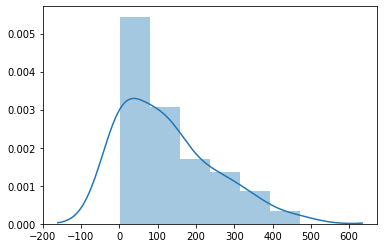

In [51]:
sns.distplot(X_train)

### as data is normaly distributed so we will go for standerd scalar

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()

In [71]:
X_train_sc = sc.fit(X_train)

In [62]:
X_train_sc.max()

2.3036620805148136

In [72]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [73]:
X_train_sc.min()

-1.7036524770338342

In [74]:
X_train_sc[:4]

array([[-1.2608635 , -1.21810835, -1.26234592],
       [ 0.40897457,  0.64834799,  0.6147756 ],
       [-0.57358259, -0.49772169, -0.54600707],
       [ 1.12340732,  0.56648587,  0.31150805]])

In [65]:
lm_sc = LinearRegression()

In [66]:
lm_sc.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Check Score after scalling

In [75]:
lm_sc.score(X_train_sc, y_train)*100

83.2159844145282

In [76]:
lm_sc.score(X_test_sc, y_test)*100

78.87740373160534

In [77]:
from sklearn.linear_model import Ridge, Lasso

In [78]:
rd  =Ridge()

In [80]:
rlm =rd.fit(X_train_sc, y_train)

In [81]:
rlm.score(X_test_sc, y_test)

0.7915642698207603

In [82]:
ls = Lasso()

In [84]:
llm = ls.fit(X_train_sc, y_train)

In [85]:
llm.score(X_test_sc, y_test)

0.7699349579387533

In [88]:
lm.pred = lm.predict(X_test_sc)

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
pol = PolynomialFeatures()

In [92]:
pol.fit(X_train_sc)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [94]:
X_train_pol = pol.transform(X_train_sc)
x_test_pol = pol.transform(X_test_sc)

In [95]:
pol_lm = LinearRegression()

In [96]:
pol_lm.fit(X_train_pol, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
pol_lm.score(x_test_pol,y_test)

0.7349017234061666